In [3]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy
import emcee

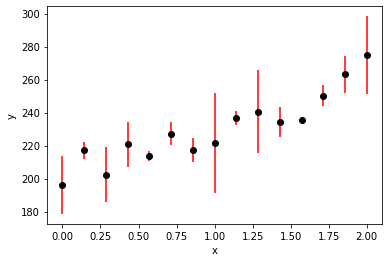

In [26]:
datos = np.load('test_line.npy')
x = datos[0]
y = datos[1]
yerr = datos[2]

plt.errorbar(x, y, yerr,linestyle='none', marker='o',color='black', ecolor='red')
plt.xlabel('x')
plt.ylabel('y');

Definimos funciones de recta y likelihood

In [27]:
#El modelo sera una recta
def recta(x,a,b):
    return a*x + b

def chisq(t,datos):
    x = datos[0]
    y = datos[1]
    yerr = datos[2]
    modelo = recta(x,t[0],t[1])
    chisq = (y-modelo)**2 / yerr**2
    
    return chisq.sum()

def likelihood(t, x,y,yerr):
    modelo = recta(x, t[0], t[1])
    result = (y-modelo)**2 / yerr**2
    suma = -0.5*result.sum()
    return suma

Por medio de chisq obtenemos la ordenada al origen y la pendiente

<Figure size 432x288 with 0 Axes>

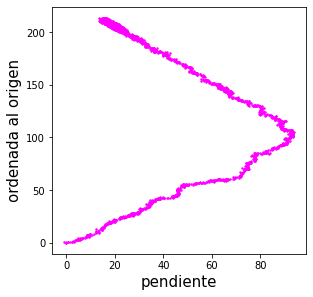

In [19]:


sigma = 0.5
a_i = 0.
b_i = 0.
a = [a_i]
b = [b_i]
ch_i = chisq([a_i,b_i],[x,y,yerr])

for i in range(10000): 
    #Generamos dos numeros random con los que comparar
    a_rand = np.random.normal(a_i,sigma) 
    b_rand = np.random.normal(b_i,sigma) 
    ch_new = chisq([a_rand,b_rand],[x,y,yerr]) 
    if ch_new < ch_i:
        a.append(a_rand)
        b.append(b_rand)
        a_i = a_rand
        b_i = b_rand
        ch_i = ch_new
        
    else:
        r = -np.log(np.random.uniform(0,1))
        div = abs(ch_new-ch_i)
        if div<r:
            a.append(a_rand)
            b.append(b_rand)
            a_i = a_rand
            b_i = b_rand
            ch_i = ch_new

        else:
            a.append(a_rand)
            b.append(b_rand)
            


plt.figure(3)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(a,b,s=2,color = 'magenta')
plt.ylabel('ordenada al origen',fontsize=15)
plt.xlabel('pendiente',fontsize=15);

In [103]:
print('a=',a[10000])
print('b=',b[10000])

a= 18.390399502929032
b= 207.92493420312863


Usando emcee obtenemos:

In [38]:
pos0=[1,100]

pos=pos0+ 1e-4*np.random.randn(45,2)
nwalkers, ndim=pos.shape

sampler=emcee.EnsembleSampler(nwalkers,ndim,likelihood,args=(datos))
sampler.run_mcmc(pos, 5000,progress=True);

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:14<00:00, 343.55it/s]


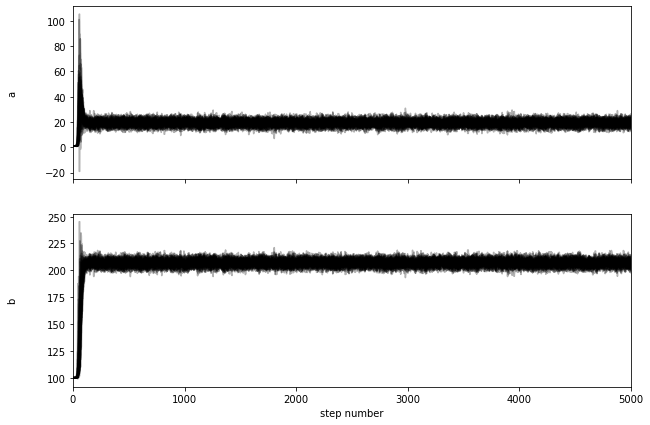

In [39]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["a", "b"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [56]:

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
suma_a = 0
suma_b = 0
N = 50
for i in range(N):
    suma_a = flat_samples[13691-N + i,0] + suma_a
    suma_b = flat_samples[13691-N + i,1] + suma_b

a_prom = suma_a/N
b_prom = suma_b/N

print('a=',a_prom)
print('b=',b_prom)

a= 19.617903207457214
b= 206.37851519015848
